In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm
import arviz as az


In [2]:
pm.__version__

'3.9.4'

In [3]:
x = np.array([-.86, -.30, -.05, .73])
# n = np.array([5, 5, 5, 5])
y  = np.array([0, 1, 3, 5])

In [4]:
with pm.Model() as m:
    a = pm.Flat('a')
    b = pm.Flat('b')
    n = pm.DiscreteUniform('n', 3, 7)

    logit = a + b * x
    theta = pm.math.invlogit(logit)

    obs = pm.Binomial('obs', p=theta, n=n, observed=y)

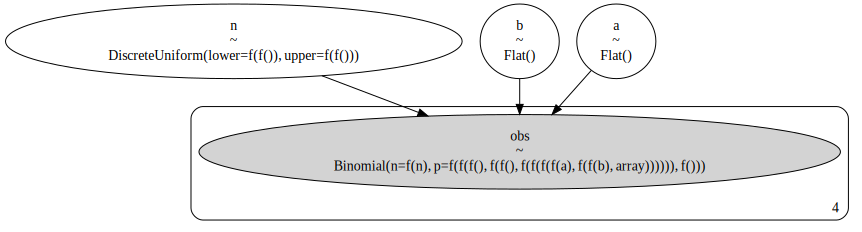

In [5]:
pm.model_to_graphviz(m)

In [6]:
intervals = {
    'b': np.linspace(-10, 40, 200),
    'a': np.linspace(-5, 10, 100),
    'n': np.array([3, 4, 5, 6, 7])
}

with m:
    mmap = pm.find_MAP()
    grid = pm.compute_grid(intervals)


In [7]:
# a_marginal = np.sum(np.exp(lly), axis=1)
# plt.plot(intervals['a'], a_marginal)

In [8]:
# b_marginal = np.sum(np.exp(lly), axis=0)
# plt.plot(intervals['b'], b_marginal)


In [9]:
# mode = m.logp(mmap)
# levels = np.arange(.05, .951, .1) * np.exp(mode)
# CS = plt.contour(intervals['a'], intervals['b'], np.exp(lly).T, levels, origin='lower')

(0, 2)


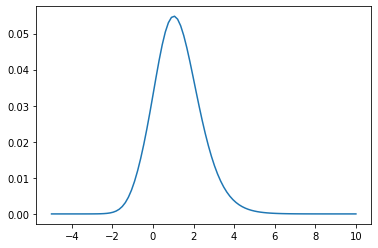

In [10]:
a = grid['a']
plt.plot(a.index, a)

(1, 2)


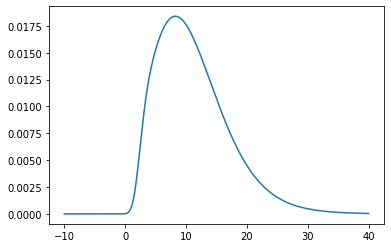

In [11]:
b = grid.marginal('b')
plt.plot(b.index, b)

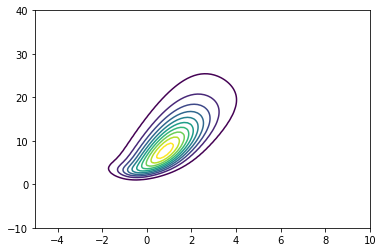

In [12]:
mode = m.logp(mmap)
levels = np.arange(.05, .951, .1)
plt.contour(intervals['a'], intervals['b'],
            grid.joint(('a', 'b')), levels, origin='lower')


(0, 1)


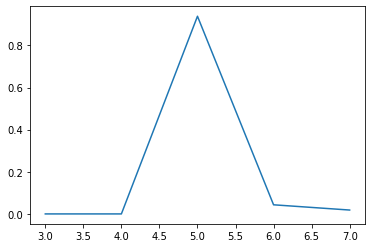

In [14]:
b = grid.marginal('n')
plt.plot(b.index, b)

In [15]:
b


3    0.000000
4    0.000000
5    0.938354
6    0.043285
7    0.018361
Name: PMF, dtype: float64